# In this notebook, we will be trying to extract potential findings from an online job postings 

here are some of the goals that we want to achieve in this notebook
 - Get used to this new dataset that I found on Kaggle (https://www.kaggle.com/datasets/madhab/jobposts)
 - Abstract Keywords in the job posting dataset so that I can make a dataframe of hybrid / remote job postings
 - Abstract Keywords in the job posting dataset so that I can make a dataframe of tech job postings
 - Compare that with patents being granted before / after covid started to see if there was an increase in these types of postings
 

In [2]:
# Here, we are going to load the generic g_patent and g_cpc_current DataFrames as well as our pandas, matplotlib etc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set( style = 'white' )

# Here is a variable change in the width of the string for the columns. I am placing it here as it may need
# to be changed often, so I will move it right here!
pd.options.display.max_colwidth = 1000

In [3]:
df_patent = pd.read_csv("g_patent.tsv", delimiter='\t', dtype={'patent_id': str, 
                                                        'patent_type': str, 
                                                        'patent_title': str,
                                                        'patent_abstract': str,
                                                        'wipo_kind': str,
                                                        'num_claims': int,
                                                        'withdrawn': int,
                                                        'filename': str}, parse_dates=[2])
df_patent.head(20)

,patent_id,patent_type,patent_date,patent_title,patent_abstract,wipo_kind,num_claims,withdrawn,filename
0,10000000,utility,2018-06-19,Coherent LADAR using intra-pixel quadrature detection,"A frequency modulated (coherent) laser detection and ranging system includes a read-out integrated circuit formed with a two-dimensional array of detector elements each including a photosensitive region receiving both return light reflected from a target and light from a local oscillator, and local processing circuitry sampling the output of the photosensitive region four times during each sample period clock cycle to obtain quadrature components. A data bus coupled to one or more outputs of each of the detector elements receives the quadrature components from each of the detector elements for each sample period and serializes the received quadrature components. A processor coupled to the data bus receives the serialized quadrature components and determines an amplitude and a phase for at least one interfering frequency corresponding to interference between the return light and the local oscillator light using the quadrature components.",B2,20,0,ipg180619.xml
1,10000001,utility,2018-06-19,Injection molding machine and mold thickness control method,"The injection molding machine includes a fixed platen, a moveable platen moving forward and backward by a toggle link, a base plate supporting the toggle link, a driving part for mold clamping to operate the toggle link, a driving part for mold thickness adjustment to adjust a mold thickness, and a control unit to calculate a movement distance gap before a clamping process by controlling the driving part for mold thickness adjustment to move the base plate backward and then move the base plate forward to a target movement position based on a fold amount of the toggle link, and control the driving part for mold thickness adjustment using a value obtained by deducting the movement distance gap from the fold amount of the toggle link when producing a clamp force.",B2,12,0,ipg180619.xml
2,10000002,utility,2018-06-19,Method for manufacturing polymer film and co-extruded film,"The present invention relates to: a method for manufacturing a polymer film, the method including a base film forming step for co-extruding a first resin containing a polyamide-based resin and a second resin containing a copolymer including polyamide-based segments and polyether-based segments; a co-extruded film including a base film including a first resin layer containing a polyamide-based resin, and a second resin layer containing a copolymer having polyamide-based segments and polyether-based segments; to a co-extruded film including a base film including a first resin layer and a second resin layer, which have different melting points; and to a method for manufacturing a polymer film, the method including a base film forming step including a step of co-extruding a first resin and a second resin, which have different melting points.",B2,9,0,ipg180619.xml
3,10000003,utility,2018-06-19,Method for producing a container from a thermoplastic,"The invention relates to a method for producing a container (2) from a thermoplastic, having at least one surround (4), provided in the container wall (1), for a container opening. The surround (4) comprises a structure behind which parts of the container wall (1) extend and/or which is penetrated by said parts. The method is carried out using a multi-part blow mold that has at least two mold parts, each having at least one cavity, wherein the surround is placed as an insert in the cavity (10) of the blow mold (7). The method comprises pressing the preform that has been forced into the cavity (10) into the structure of the surround (4) by means of a tool which is brought to bear on the preform (12) on the side of the preform facing away from the cavity (10).",B2,18,0,ipg180619.xml
4,10000004,utility,2018-06-19,"Process of obtaining a double-oriented film, co-extruded, and of low thickness mad

In [4]:
df_cpc = pd.read_table("g_cpc_current.tsv", delimiter="\t", dtype={"patent_id": int,
                                                               "cpc_sequence": int,
                                                               "cpc_section": str,
                                                               "cpc_subclass": str,
                                                               "cpc_group": str,
                                                               "cpc_type": str,
                                                               "cpc_symbol_position": str})
df_cpc.head(20)

,patent_id,cpc_sequence,cpc_section,cpc_class,cpc_subclass,cpc_group,cpc_type,cpc_symbol_position
0,4796895,1,F,F16,F16H,F16H61/00,inventional,NaN
1,10913199,0,B,B29,B29C,B29C55/08,inventional,NaN
2,5208443,0,B,B29,B29C,B29C65/366,inventional,NaN
3,7830588,6,G,G09,G09G,G09G2310/0275,additional,NaN
4,7232943,1,A,A01,A01H,A01H5/10,inventional,NaN
5,10815370,2,C,C08,C08F,C08F265/08,inventional,NaN
6,8271025,4,H,H04,H04M,H04M15/00,inventional,NaN
7,8208778,1,G,G02,G02B,G02B6/12002,inventional,NaN
8,10299603,18,B,B64,B64D,B64D11/00154,inventional,NaN
9,10941581,24,B,B32,B32B,B32B2255/10,additional,NaN


# Here we have two independent collectings of job postings online

starting from the first dataframe and moving down, we have
 - a dataset from kaggle that spans from 2004 to 2015 of online yahoo mail listings of job postings online (https://www.kaggle.com/datasets/madhab/jobposts)
 - a dataset from US Bureau of Labor Statistics detailing unmet demands for labor and open jobs. Does not exactly mean the number of open jobs, as some of the positions could have been filled or where removed for any reason. This number is likely to be higher (https://fred.stlouisfed.org/series/JTSJOL)

In [21]:
online_df = pd.read_csv('onlinejobpostings.csv')
online_df['date'] = pd.to_datetime(online_df['date'], errors = 'coerce')
online_df.head(3)

,jobpost,date,Title,Company,AnnouncementCode,Term,Eligibility,Audience,StartDate,Duration,...,Salary,ApplicationP,OpeningDate,Deadline,Notes,AboutC,Attach,Year,Month,IT
0,"AMERIA Investment Consulting Company\r\nJOB TITLE: Chief Financial Officer\r\nPOSITION LOCATION: Yerevan, Armenia\r\nJOB DESCRIPTION: AMERIA Investment Consulting Company is seeking a\r\nChief Financial Officer. This position manages the company's fiscal and\r\nadministrative functions, provides highly responsible and technically\r\ncomplex staff assistance to the Executive Director. The work performed\r\nrequires a high level of technical proficiency in financial management\r\nand investment management, as well as management, supervisory, and\r\nadministrative skills.\r\nJOB RESPONSIBILITIES: \r\n- Supervises financial management and administrative staff, including\r\nassigning responsibilities, reviewing employees' work processes and\r\nproducts, counseling employees, giving performance evaluations, and\r\nrecommending disciplinary action;\r\n- Serves as member of management team participating in both strategic\r\nand operational planning for the company;\r\n- Directs and ove...",2004-01-05,Chief Financial Officer,AMERIA Investment Consulting Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"To apply for this position, please submit a\r\ncover letter and a resume addressing relevant qualifications and\r\nexperience and information on professional reference strictly to Tatevik\r\nHovhannisyan; Executive Assistant: fax: 374-1-546800 or e-mail:ameria@.... Tel: 374 (1) 524040; 524140. Only shortlisted\r\ncandidates will be notified for an interview.\r\nPlease clearly mention in your application letter that you learned of\r\nthis job opportunity through Career Center and mention the URL of its\r\nwebsite - www.careercenter.am, Thanks.",NaN,26 January 2004,NaN,NaN,NaN,2004,1,False
1,"International Research & Exchanges Board (IREX)\r\nTITLE: Full-time Community Connections Intern (paid internship)\r\nDURATION: 3 months\r\nLOCATION: IREX Armenia Main Office; Yerevan, Armenia \r\nDESCRIPTION: IREX currently seeks to fill the position of a paid\r\nIntern for the Community Connections (CC) Program. The position is based\r\nin the Yerevan office however applicants must be willing to travel\r\nthroughout Armenia as necessary. This position reports directly to the\r\nCC Program Manager.\r\nRESPONSIBILITIES: \r\n- Presenting the CC program to interested parties; \r\n- Assisting in planning and scheduling of programmatic meetings and\r\nevents (this includes coordinating logistics for CC staff, visitors and\r\nparticipants);\r\n- Assisting the Program Staff;\r\n- Translation/Interpretation from Armenian to English and vice versa;\r\n- Helping create, maintain and update the CC filing system and\r\ndatabases;\r\n- Completing general administrative tasks for the CC...",2004-01-07,Full-time Community Connections Intern (paid internship),International Research & Exchanges Board (IREX),NaN,NaN,NaN,NaN,NaN,3 months,...,NaN,"Please submit a cover letter and resume to:\r\nIREX Yerevan office, Attn: Community Connections Program; 50 Khanjian\r\nStr, Tekeyan Center, 2nd floor, Yerevan 375010, Armenia. E-mail:cc@.... \r\nPlease clearly mention in your application letter that you learned of\r\nthis opportunity through Career Center and mention the URL of its\r\nwebsite - www.careercenter.am, Thanks.",NaN,12 January 2004,NaN,"The International Research & Exchanges Board (IREX) is\r\na US-Based private, non-profit organization. The IREX Armenia Yerevan\r\noffice was established in 1992 and is a place in Armenia where\r\ninterested individuals can obtain up-to-date information on study,\r\nresearch, and professional internship opportunities in the Unites\r\nStates.\r\nIREX Yerevan collaborates with national government branches, local and\r\ninternational NGOs and institutions of higher education in the promotion\r\nof IREX- administered research and professional programs. The goal of\r\nthese pr

<Axes: title={'center': 'Online Tech Jobs Per Year'}, xlabel='Year', ylabel='Online Tech Jobs Posted'>

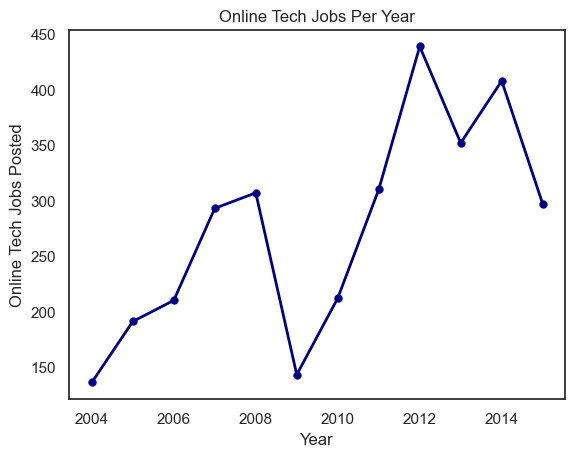

In [50]:
online_techjob = online_df.loc[(online_df['IT'] == True)]
online_techjob = online_techjob['date'].dt.year.value_counts()
online_techjob.sort_index(inplace=True)
ax = online_techjob.plot(lw=2, colormap='jet', marker='.', markersize=10, title='Online Tech Jobs Per Year')
ax.set(xlabel="Year", ylabel="Online Tech Jobs Posted")
ax

2004.0    136
2005.0    191
2006.0    210
2007.0    293
2008.0    307
2009.0    143
2010.0    212
2011.0    310
2012.0    439
2013.0    352
2014.0    408
2015.0    297
Name: date, dtype: int64

In [7]:
avail_df = pd.read_csv('jobavailability.csv')
avail_df["DATE"] = pd.to_datetime(avail_df['DATE'])
avail_df.rename(columns={"JTSJOL": "online_jobs", "DATE": "date"}, inplace=True)
avail_df.head(20)

,date,online_jobs
0,2000-12-01,5088
1,2001-01-01,5234
2,2001-02-01,5097
3,2001-03-01,4762
4,2001-04-01,4615
5,2001-05-01,4425
6,2001-06-01,4361
7,2001-07-01,4447
8,2001-08-01,4024
9,2001-09-01,4071


In [8]:
# df.groupby([df['birthdate'].dt.year.rename('year'), df['birthdate'].dt.month.rename('month')]).agg({'count'})
avail_series = avail_df.groupby(avail_df.date.dt.year)['online_jobs'].sum()

In [9]:
avail_series

date
2000      5088
2001     52195
2002     41434
2003     38861
2004     43704
2005     49295
2006     55018
2007     56252
2008     45586
2009     30017
2010     35627
2011     41162
2012     46092
2013     48846
2014     57277
2015     66766
2016     70266
2017     73422
2018     85310
2019     85903
2020     76294
2021    119681
2022    134157
2023     50426
Name: online_jobs, dtype: int64

<Axes: title={'center': 'Online Jobs Per Year'}, xlabel='Year', ylabel='Online Jobs Posted'>

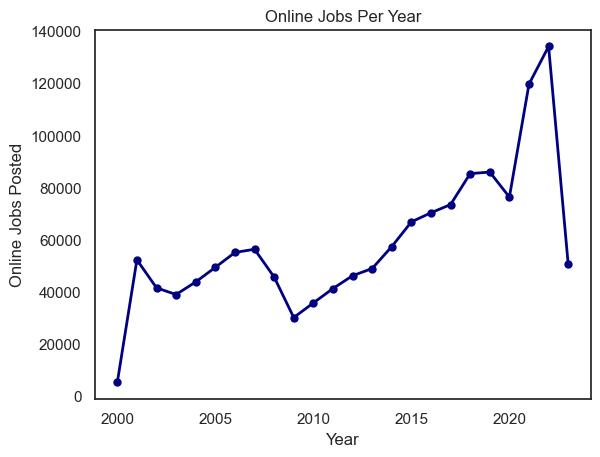

In [10]:
# ax = df_unemployment.plot(ax=ax, lw=2, colormap='jet', marker='.', markersize=10, title='Comparing Granted Patents Per Year and The Population Number in thousands of the USA')
# ax.set(xlabel="Year", ylabel="Patents Per Year / Population Size of America")
# ax
ax = avail_series.plot(lw=2, colormap='jet', marker='.', markersize=10, title='Online Jobs Per Year')
ax.set(xlabel="Year", ylabel="Online Jobs Posted")
ax

In [11]:
pre_covid_jobs = pre_covid_total = post_covid_jobs = post_covid_total = 0
for index, value in avail_series.items():
    if index > 2020:
        post_covid_jobs += value
        post_covid_total += 1
    else:
        pre_covid_jobs += value
        pre_covid_total += 1
    
(post_covid_jobs / post_covid_total) / (pre_covid_jobs / pre_covid_total)

1.928485216155159

In [12]:
tech_patents = df_cpc.loc[(df_cpc['cpc_section'] == "Y")]
tech_patents = tech_patents.drop(columns=["cpc_sequence", "cpc_class", "cpc_subclass", "cpc_group", "cpc_symbol_position", "cpc_type"], axis=1)
tech_patents['patent_id'] = tech_patents['patent_id'].astype(str)
tech_patents = pd.merge(df_patent.drop(axis=1, columns=df_patent.columns[5:]), tech_patents, on="patent_id")
tech_patents['patent_abstract'] = tech_patents['patent_abstract'].astype(str)
tech_patents['patent_title'] = tech_patents['patent_title'].astype(str)
tech_patents['full_patent_details'] = tech_patents[['patent_title', 'patent_abstract']].agg(' '.join, axis=1)
tech_patents.drop(columns=["patent_title", "patent_abstract"], axis=1, inplace=True)

In [13]:
tech_patents

,patent_id,patent_type,patent_date,cpc_section,full_patent_details
0,10000005,utility,2018-06-19,Y,"Article vacuum formation method and vacuum forming apparatus A vacuum forming apparatus is provided that forms an article having a covering bonded to the surface of a substrate in a molding space using a first mold and a second mold. The vacuum forming apparatus is provided with clamps for grasping the covering between the first and second molds arranged at the open positions. The clamps are movable between an interfering position, at which the clamps are located in the movement ranges of the first and second molds, and standby positions, at which the clamps are outside the movement ranges. After the covering is heated, the clamps grasping the covering move to the standby positions and stretch the covering. The first and second molds move to the closed positions and the article is molded between the first and second molds so that the stretched covering and the substrate are bonded to each other."
1,10000006,utility,2018-06-19,Y,"Thermoforming mold device and a process for its manufacture and use A thermoforming mold device (1) providing a piece with a thin wall starting with a sheet of thermoplastic material is provided. At least one (3) of two parts of the mold (3, 3′) comprises at least one means (4) of local deformation of a sheet (2′) in the mold (3, 3′) in its closed state, the at least one means (4) comprises a piece of hollow molding with a peripheral edge, which can be connected selectively to a source of suction and can be displaced between a folded position, in which the molding piece is situated in close proximity with the wall of the thermoformed piece, and a deployed position, in which the molding piece is applied under pressure with its peripheral edge against the wall of the thermoformed piece upholding the other part of the mold."
2,10000011,utility,2018-06-19,Y,"Supports for sintering additively manufactured parts To reduce distortion in an additively manufactured part, a shrinking platform is formed from a metal particulate filler in a debindable matrix. Shrinking supports of the same material are formed above the shrinking platform, and a desired part of the same material is formed upon them. A sliding release layer is provided below the shrinking platform of equal or larger surface area than a bottom of the shrinking platform to lateral resistance between the shrinking platform and an underlying surface. The matrix is debound sufficient to form a shape-retaining brown part assembly including the shrinking platform, shrinking supports, and the desired part. The shape-retaining brown part assembly is heated to shrink all of the components together at a same rate via atomic diffusion."
3,10000017,utility,2018-06-19,Y,"Method for mounting a vortex generator and mounting apparatus for carrying out the method The invention relates to a method for securing an attachment (3, 33) to a component, in particular a rotor blade (1), in which the component is provided with an adhesion surface (36), the attachment (3, 33) is provided with a corresponding adhesion surface (9), the attachment (3, 33) is provided with an adhesive-conveying connection to the corresponding adhesion surface (9), the adhesion surface (36) is placed on the corresponding adhesion surface (9), a gap (53) is formed between the adhesion surface (36) and the corresponding adhesion surface (9), the attachment (3, 33) is pressed against the corresponding adhesion surface (9) and at the same time the adhesive (80) is injected into the gap (53) through the adhesive-conveying connection."
4,10000017,utility,2018-06-19,Y,"Method for mounting a vortex generator and mounting apparatus for carrying out the method The invention relates to a method for securing an attachment (3, 33) to a component, in particular a rotor blade (1), in which the component is provided with an adhesion surface (36), the attachment (3, 33) is provided with a corresponding adhesion surfa

In [14]:
# here we are concatinating the rows that have these certain keywords, that I personally chose as being the highest
# repeated and highest changes to being a virtual meeting patent.
meetings_df = pd.concat([tech_patents.loc[tech_patents['full_patent_details'].str.contains('conference', case=False)],
               tech_patents.loc[tech_patents['full_patent_details'].str.contains('communication', case=False)],
               tech_patents.loc[tech_patents['full_patent_details'].str.contains('video stream', case=False)],
               tech_patents.loc[tech_patents['full_patent_details'].str.contains('videoconferencing', case=False)],
               tech_patents.loc[tech_patents['full_patent_details'].str.contains('meeting', case=False)]], ignore_index=True)
meeting_patents_per_year = meetings_df.groupby([meetings_df['patent_date'].dt.year.rename('year')]).agg({'count'})
meeting_patents_per_year.drop(inplace=True, columns=meeting_patents_per_year.columns[1:5])
meeting_patents_per_year = meeting_patents_per_year['patent_id']['count']
meeting_patents_per_year = meeting_patents_per_year.drop(meeting_patents_per_year.index[0:24])

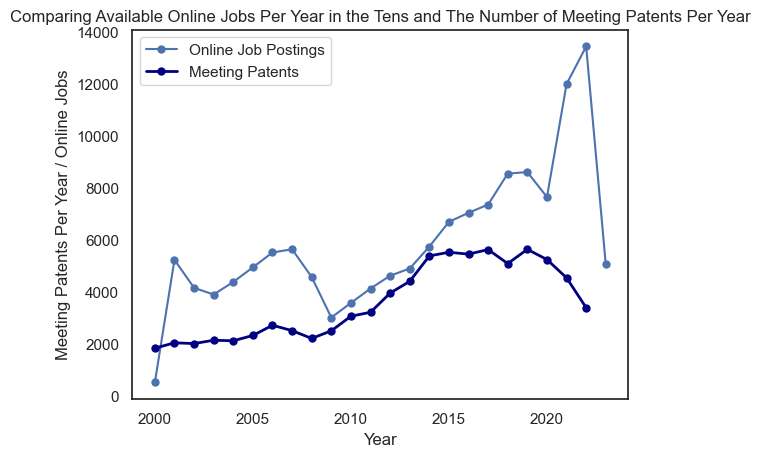

In [53]:
ax = avail_series.div(10).plot(marker='.', markersize=10)
ax = meeting_patents_per_year.plot(ax=ax, lw=2, colormap='jet', marker='.', markersize=10, title='Comparing Available Online Jobs Per Year in the Tens and The Number of Meeting Patents Per Year')
ax.set(xlabel="Year", ylabel="Meeting Patents Per Year / Online Jobs")
ax.legend(['Online Job Postings', 'Meeting Patents'])